# SMS Spam Detection
    
    The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

    Acknowledgements

    The original dataset can be found in https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.


### 1. Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Dataset Loading and Data Preprocessing
#### 2.1. Read dataset using pandas

ISO-8859 là một họ các lược đồ mã hóa một byte được sử dụng để biểu diễn các bảng chữ cái có thể được biểu diễn trong phạm vi từ 127 đến 255

In [3]:
sms = pd.read_csv('sms_spam.csv', encoding="ISO-8859-1")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### 2.2. Remove redundant attributes

Cách 2:  sms = sms.loc[:, ~sms.columns.str.contains('^Unnamed')]

In [4]:
del sms['Unnamed: 2']
del sms['Unnamed: 3']
del sms['Unnamed: 4']

sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 2.3. Rename columns
Requires: v1 -> label, v2 -> message

In [5]:
sms.columns = ['label', 'message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 2.4. Modify columns
Requires: change ham to 0, and spam to 1 in Label Attribute.

In [6]:
sms.replace(['ham','spam'], [0,1], inplace=True)
sms.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### 2.5. Add new column
Requires: Add message_len Attribute that is the length of the message.

In [7]:
print(sms.message.str.len())
sms['length'] = sms.message.str.len()

sms.head()

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: message, Length: 5572, dtype: int64


,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#### 2.6. Histogram graph

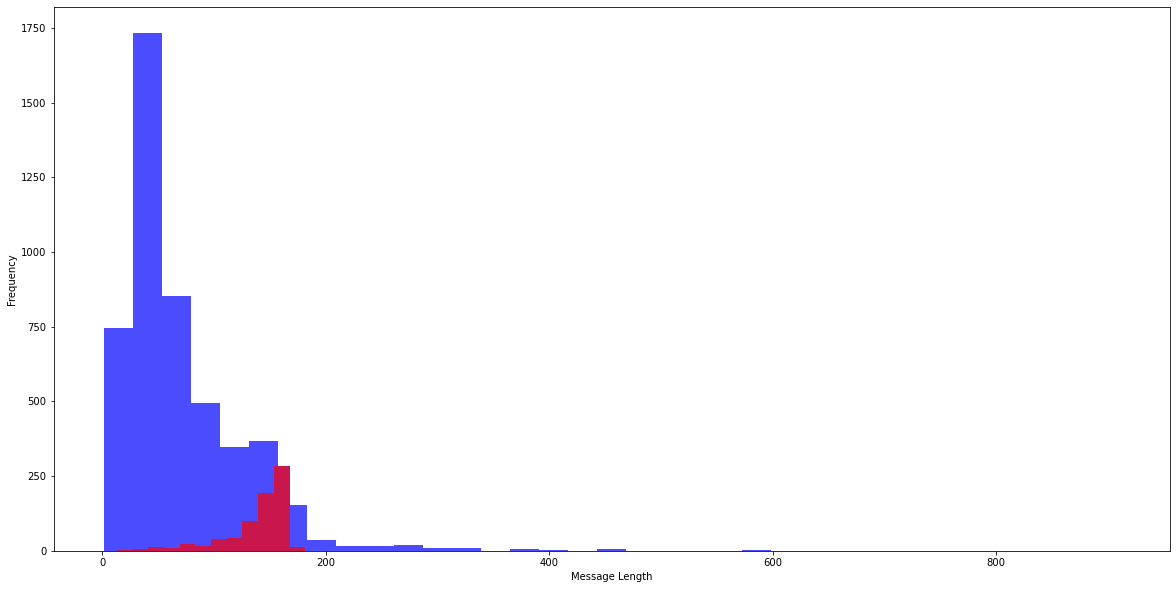

In [8]:
ham = sms[sms['label']== 0]
spam = sms[sms['label']== 1]

plt.figure(figsize=(20,10)) # chinh size cua grap
plt.hist(ham['length'],bins = 35, label='Ham message', color='#4C4CFF')
plt.hist(spam['length'],bins = 15, label='Spam message',color = '#C9164C')
plt.ylabel('Frequency')
plt.xlabel('Message Length')

plt.show()

#### 2.7. Preprocessing text 
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text

In [8]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # check dau cau
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join lai
    nopunc = ''.join(nopunc)
    #Detele stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [9]:
print(sms['message'])
print("\n")

for i in sms['message']:
    sms = sms.replace([i], text_process(i))
print(sms['message'])

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object


0       Go jurong point crazy Available bugis n great ...
1                                   Ok lar Joking wif oni
2       Free entry wkly comp win FA Cup final tkts 21s...
3                         dun say early hor c already say
4                  Nah think goes usf lives around though
                           

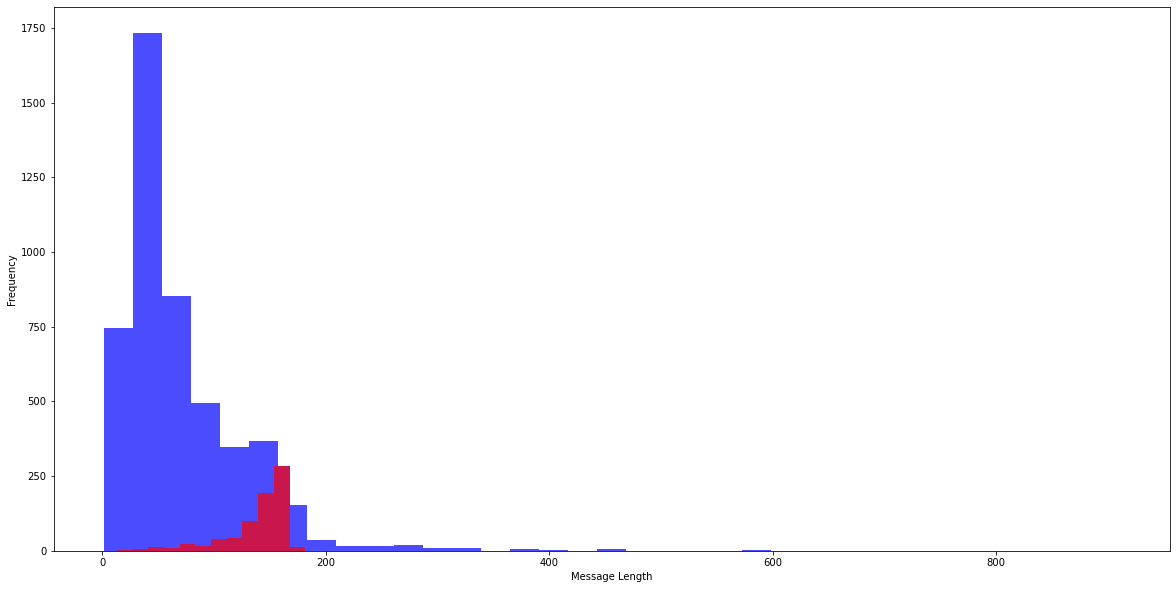

In [63]:
plt.figure(figsize=(20,10))
plt.hist(ham['length'],bins=35, label='Ham message', color='#4C4CFF')
plt.hist(spam['length'],bins=15, label='Spam message',color = '#C9164C')

plt.ylabel('Frequency')
plt.xlabel('Message Length')

plt.show()


#### 2.8. Feature extraction using TfidfVectorizer

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

tfidf = TfidfVectorizer(min_df=5,max_df= 0.8,max_features=3000,sublinear_tf=True)
tfidf.fit(sms['message'])
x_1 = tfidf.transform(sms['message'])

#### 2.9. Feature extraction using HashingVectorizer

In [65]:
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

tfidf = HashingVectorizer(n_features=2**4)
tfidf.fit(sms['message'])
x_3 = tfidf.transform(sms['message'])

#### 2.10. Feature extraction using CountVectorizer

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = sms['message']
vectorizer = CountVectorizer()
X_5 = vectorizer.fit_transform(corpus)

#### 2.11. Your contributions

    Create clean_msg_2 with your text_process function. 
    Then, apply feature extraction using TfidfVectorizer, HashingVectorizer and CountVectorizer
    Compare the result with the default text_process function. 

In [68]:
sms_2 = pd.read_csv('sms_spam.csv', encoding="ISO-8859-1")
sms_2 = sms_2.loc[:, ~sms_2.columns.str.contains('^Unnamed')]
print(sms_2.head(5))

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [69]:
sms_2.columns = ['label', 'message']
print(sms_2.head(5))

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [70]:
import string, nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def clean_msg_2(mess):
    mess = mess.lower()
    
    #remove “unnecessary” words: email address, phone number, etc
    pattern = '((978[\--– ])?[0-9][0-9\--– ]{10}[\--– ][0-9xX])|((978)?[0-9]{9}[0-9Xx])'
    mess = mess.sub(pattern, '', mess,0)
    
    # remove khoang trang
    mess = " ".join(mess.split())
    
    # lemmatize string: go = goes
    word_tokens = word_tokenize(mess)
    mess = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # delete stopwỏd
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

for i in sms_2['message']:
    sms_2 = sms_2.replace([i],text_process(i))

print(sms_2['message'])

NameError: name 'text_process' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

tfidf = TfidfVectorizer(min_df=5,max_df= 0.8,max_features=3000,sublinear_tf=True)
tfidf.fit(sms_2['message'])
x_2 = tfidf.transform(sms_2['message'])
print(x_2[1])
print("\n")
print(x_1[1])

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

tfidf = HashingVectorizer(n_features=2**4)
tfidf.fit(sms_2['message'])
x_4 = tfidf.transform(sms_2['message'])
print(x_4[2])
print("\n")
print(x_3[2])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = sms_2['message']
vectorizer = CountVectorizer()
X_6 = vectorizer.fit_transform(corpus)
print(X_5[1])
print("\n")
print(X_6[1])

### 3. Spam detection

In [71]:
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn import metrics
import time

y = sms.label

# only using the decision tree classifier with default setting for training and predicting. 
# In other words, make no changes to this section.

model = tree.DecisionTreeClassifier()

#### 3.1. Using TF-IDF Vectorizer

    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_tv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import time
start = time.time()

tfidf = TfidfVectorizer(min_df=5,max_df= 0.8,max_features=3000,sublinear_tf=True)
tfidf.fit(sms['message'])
X_Vectorizer = tfidf.transform(sms['message'])

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# evaluate model
scores_1 = cross_val_score(model, X_Vectorizer, y, scoring='accuracy', cv=cv, n_jobs=-1)

end = time.time()
print("Time:",end - start)
print("Mean of Scores: ",mean(scores_1))
print("Scores:", scores_1)

Time: 2.3187990188598633
Mean of Scores:  0.966978447963546
Scores: [0.96950673 0.96053812 0.96499102 0.96947935 0.97037702]


#### 3.2. Using Hashing Vectorizer
    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_hv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [73]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import time
start = time.time()

tfidf = HashingVectorizer(n_features=2**4)
tfidf.fit(sms['message'])
X_Hashing = tfidf.transform(sms['message'])

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# evaluate model
scores_2 = cross_val_score(model, X_Hashing, y, scoring='accuracy', cv=cv, n_jobs=-1)

end = time.time()
print("Time:",end - start)
print("Mean of Scores: ",mean(scores_2))
print("Scores:", scores_2)

Time: 1.0671470165252686
Mean of Scores:  0.8876519792932992
Scores: [0.89865471 0.87982063 0.87342908 0.90035907 0.88599641]


#### 3.3. Using Count Vectorizer

    Requirements:
    1. Using 5-fold for spliting the dataset 
    2. Add accuracy of each fold to acc_cv
    3. Caculate and print the proccessing time
    4. Print mean of accuracy

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import time
start = time.time()

tfidf = CountVectorizer()
tfidf.fit(sms['message'])
X_Count = tfidf.transform(sms['message'])

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# evaluate model
scores_3 = cross_val_score(model, X_Count, y, scoring='accuracy', cv=cv, n_jobs=-1)

end = time.time()
print("Time:",end - start)
print("Mean of Scores: ",mean(scores_3))
print("Scores:", scores_3)

Time: 0.41023993492126465
Mean of Scores:  0.9687737800999912
Scores: [0.967713   0.96233184 0.96768402 0.97486535 0.97127469]


#### 3.4. Ploting Accuracies in 5-Folds

[0.96950673 0.96053812 0.96499102 0.96947935 0.97037702]
[0.89865471 0.87982063 0.87342908 0.90035907 0.88599641]
[0.967713   0.96233184 0.96768402 0.97486535 0.97127469]


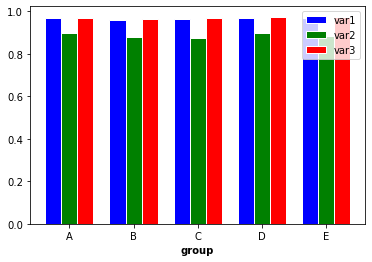

In [75]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = scores_1
bars2 = scores_2
bars3 = scores_3

print(bars1)
print(bars2)
print(bars3)

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

Text(0, 0.5, 'Accuracy')

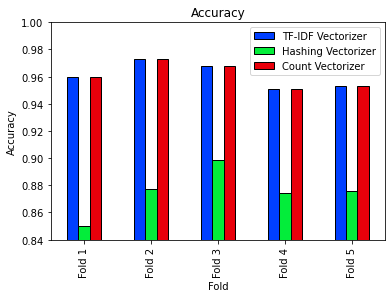

In [34]:
# enter here